In [7]:
import time
import numpy as np
import matplotlib.pyplot as plt
#import control
from control import input_output_response
from control.iosys import LinearIOSystem
from math import pi

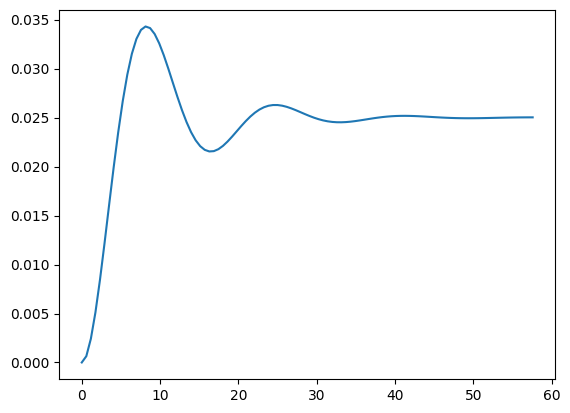

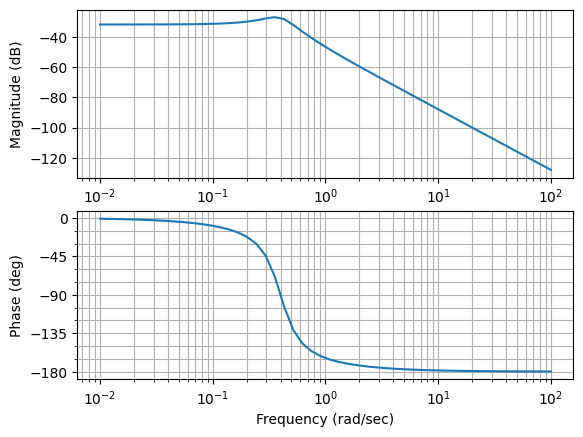

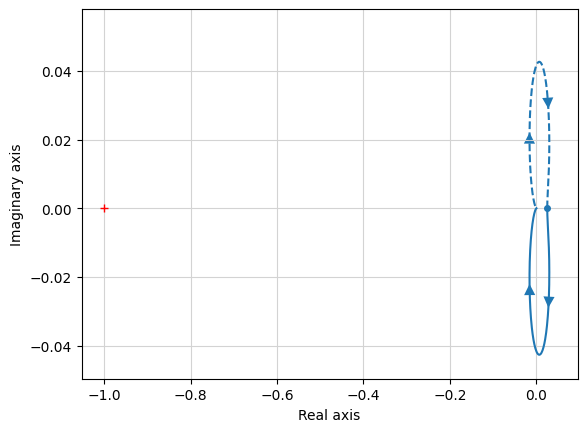

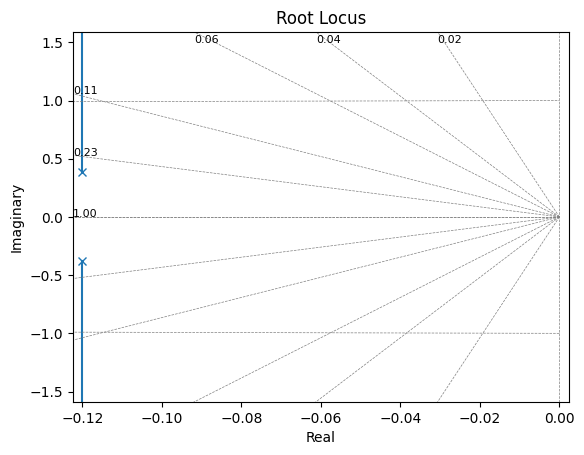

In [8]:
import os
import matplotlib.pyplot as plt   # MATLAB plotting functions
from control.matlab import *  # MATLAB-like functions
 
# Parameters defining the system
m = 250.0           # system mass
k = 40.0            # spring constant
b = 60.0            # damping constant

# System matrices
A = [[0, 1.], [-k/m, -b/m]]
B = [[0], [1/m]]
C = [[1., 0]]
sys = ss(A, B, C, 0)

# Step response for the system
plt.figure(1)
yout, T = step(sys)
plt.plot(T.T, yout.T)
plt.show(block=False)

# Bode plot for the system
plt.figure(2)
mag, phase, om = bode(sys, logspace(-2, 2), plot=True)
plt.show(block=False)

# Nyquist plot for the system
plt.figure(3)
nyquist(sys)
plt.show(block=False)

# Root lcous plot for the system
rlocus(sys)

if 'PYCONTROL_TEST_EXAMPLES' not in os.environ:
    plt.show()

[0, 0, 0]
[0.4597768783569336, 0, 0.0]
[0.7121014595031738, 0, 0.0]
[1.0393857955932617, 0, 0.0]
[1.386455774307251, 0, 0.0]
[1.8375282287597656, 0, 0.0]
[2.3008229732513428, 0, 0.0]
[2.6558029651641846, 1.462107937044974, 0.0]
[2.9837417602539062, 1.462107937044974, 0.2211175129001022]
[3.6405389308929443, -0.5980327724526799, 0.5685003525220046]
[4.048834800720215, -0.5980327724526799, 0.3530903856105151]
[4.738738298416138, -0.7704609800031157, 0.07560472171043653]
[5.469141006469727, -0.7704609800031157, -0.18324289663400217]
[6.066978693008423, -0.7704609800031157, -0.33496849468719225]
[6.661669015884399, -1.6483193979244875, -0.44698254046266733]
[6.921817779541016, -1.6483193979244875, -0.5935094538878327]
[7.670828819274902, -1.6483193979244875, -0.9230008770309595]
[8.062891244888306, -1.6483193979244875, -1.052117307833023]
[8.366728782653809, -1.6483193979244875, -1.136147186865754]
[9.074026584625244, -1.6483193979244875, -1.2887122207838233]
[9.469539165496826, -1.6483193

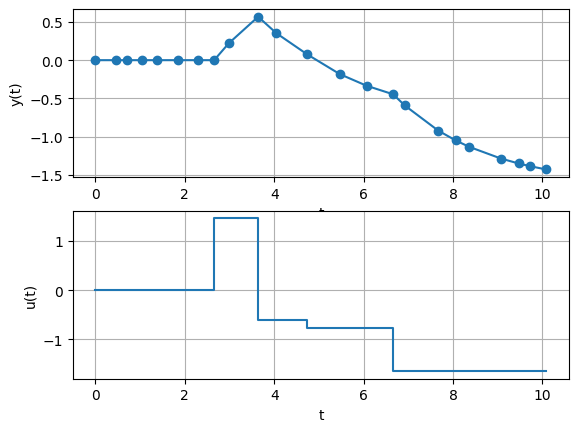

In [2]:

# Define system
# Continuous-time transfer function
G = control.tf([1], [2, 1])

# Convert to state-space representation
Gss = control.ss(G)

# Construct IO system
sys = LinearIOSystem(Gss, inputs='u', outputs='y')

def get_next_input(u, avg_time=0.5):
    """Function to simulate data acquisition"""
    t0 = time.time()
    wait_time = avg_time*(0.5 + np.random.rand())
    while time.time() - t0 < wait_time:
        pass
    if np.random.rand() > 0.8:
        u = u + np.random.randn()
    return u

# Simulate system in response to irregular inputs
t0 = time.time()
t = 0
y0 = 0
u = 0
x = np.zeros(sys.nstates)
np.random.seed(1)
sim_results = [[0, u, y0]]
print(sim_results[-1])
while t < 10:
    u_new, t_new  = get_next_input(u), time.time() - t0
    # Simulation of system up to current time
    T_sim = [t, t_new]
    T_sim, Y_sim, X_sim = input_output_response(sys, T_sim, u, X0=x,
                                                return_x=True)
    sim_results.append([T_sim[-1], u_new, Y_sim[-1]])
    print(sim_results[-1])
    # Set current state and outputs to end of simulation period
    x = X_sim[0, -1]
    u = u_new
    t = t_new

sim_results = np.array(sim_results)
t = sim_results[:, 0]
u = sim_results[:, 1]
y = sim_results[:, 2]

# Plot inputs and outputs
plt.subplot(2, 1, 1)
plt.plot(t, y, 'o-')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.subplot(2, 1, 2)
plt.step(t, u, where='post')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.grid()
plt.show()